# VOC 2012 数据集

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    if len(filenames) > 0:
        print(dirname, ' : ', len(filenames))
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        print('----------', filename)
        if 'jpg' in filename or 'xml' in filename or 'png' in filename:
            break

/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val  :  1
---------- devkit_doc.pdf
/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/SegmentationObject  :  2913
---------- 2010_002106.png
/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/Annotations  :  17125
---------- 2011_006424.xml
/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/ImageSets/Segmentation  :  3
---------- val.txt
---------- train.txt
---------- trainval.txt
/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/ImageSets/Main  :  63
---------- diningtable_train.txt
---------- person_train.txt
---------- boat_trainval.txt
---------- sofa_train.txt
---------- sheep_train.txt
---------- horse_train.txt
---------- aeroplane_trainval.txt
---------- person_trainval.txt
---------- chair_val.txt
---------- cat_train.txt
---------- dog_trainval.txt
---------- val.txt
---------- bird_trainval.txt
---------- cow_tra

### 待识别的物体有20类：
 - 人 person
 - 动物 bird, cat, cow, dog, horse, sheep
 - 交通工具 aeroplane, bicycle, boat, bus, car, motorbike, train
 - 室内物品 bottle, chair, dining table, potted plant, sofa, tv/monitor

### ImageSets 有四个文件夹
 - main文件夹有63个文件21个分类，每个分类对应train、trainval、val的编号
 - layout 被额外的标注上了人的身体部位（头、手、脚）
 - action 存放的是人的动作（running、jumping等等
 - segmentation 有分割的图像

In [2]:
import xml.dom.minidom as minidom
dom = minidom.parse('/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/Annotations/2011_006424.xml')
print(dom.toxml())

<?xml version="1.0" ?><annotation>
	<filename>2011_006424.jpg</filename>
	<folder>VOC2011</folder>
	<object>
		<name>person</name>
		<actions>
			<jumping>0</jumping>
			<other>0</other>
			<phoning>0</phoning>
			<playinginstrument>0</playinginstrument>
			<reading>0</reading>
			<ridingbike>0</ridingbike>
			<ridinghorse>1</ridinghorse>
			<running>0</running>
			<takingphoto>0</takingphoto>
			<usingcomputer>0</usingcomputer>
			<walking>0</walking>
		</actions>
		<bndbox>
			<xmax>269</xmax>
			<xmin>67</xmin>
			<ymax>369</ymax>
			<ymin>56</ymin>
		</bndbox>
		<difficult>0</difficult>
		<pose>Unspecified</pose>
		<point>
			<x>153</x>
			<y>142</y>
		</point>
	</object>
	<segmented>0</segmented>
	<size>
		<depth>3</depth>
		<height>500</height>
		<width>333</width>
	</size>
	<source>
		<annotation>PASCAL VOC2011</annotation>
		<database>The VOC2011 Database</database>
		<image>flickr</image>
	</source>
</annotation>


In [3]:
root = dom.documentElement
print(root.nodeName)
print(root.nodeValue)
print(root.nodeType)
print(root.ELEMENT_NODE)
names=dom.getElementsByTagName('name')
print(names[0].toxml())
for name in names:
    print(name.toxml())
    print(name.childNodes[0].data)
    print(name.nodeName)
    print(name.firstChild.nodeValue)
    print(name.nodeType)
    print(name.ELEMENT_NODE)
objects=dom.getElementsByTagName('object')
for obj in objects:
    print(obj.toxml())

annotation
None
1
1
<name>person</name>
<name>person</name>
person
name
person
1
1
<object>
		<name>person</name>
		<actions>
			<jumping>0</jumping>
			<other>0</other>
			<phoning>0</phoning>
			<playinginstrument>0</playinginstrument>
			<reading>0</reading>
			<ridingbike>0</ridingbike>
			<ridinghorse>1</ridinghorse>
			<running>0</running>
			<takingphoto>0</takingphoto>
			<usingcomputer>0</usingcomputer>
			<walking>0</walking>
		</actions>
		<bndbox>
			<xmax>269</xmax>
			<xmin>67</xmin>
			<ymax>369</ymax>
			<ymin>56</ymin>
		</bndbox>
		<difficult>0</difficult>
		<pose>Unspecified</pose>
		<point>
			<x>153</x>
			<y>142</y>
		</point>
	</object>


In [4]:
import xml.etree.ElementTree as ET
tree = ET.parse('/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/Annotations/2011_006424.xml')
root = tree.getroot()
for obj in root.findall('object'):
    name = obj.find('name').text
    print(name)
for obj in root.iter('object'):
    name = obj.find('bndbox').find('xmin').text
    print(name)
    name = obj.find('bndbox').find('ymin').text
    print(name)
    name = obj.find('bndbox').find('xmax').text
    print(name)
    name = obj.find('bndbox').find('ymax').text
    print(name)

person
67
56
269
369


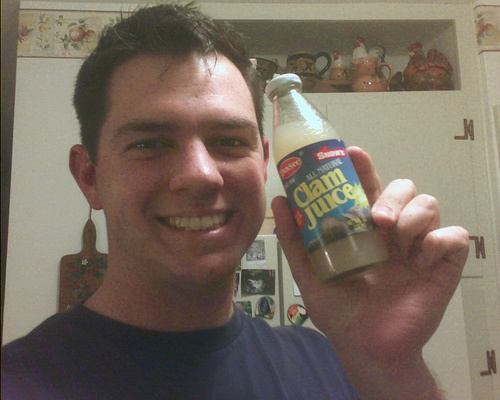

In [5]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
im = PIL.Image.open('/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/JPEGImages/2007_005304.jpg')
display(im)

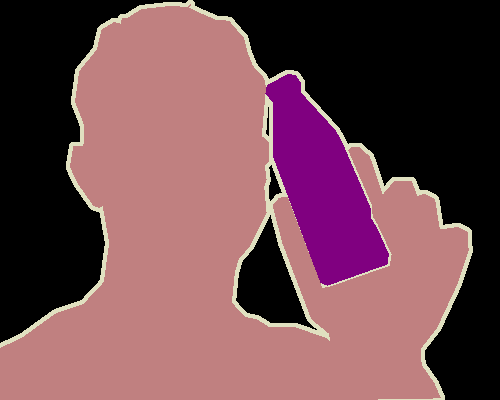

In [6]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
im = PIL.Image.open('/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/SegmentationClass/2007_005304.png')
display(im)

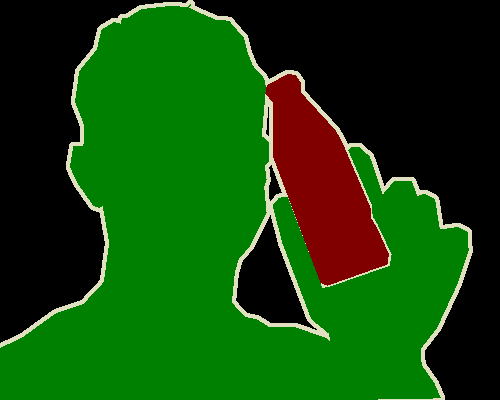

In [7]:
import PIL.Image, PIL.ImageDraw, PIL.ImageFont
font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 20)
im = PIL.Image.open('/kaggle/input/pascal-voc-2012-dataset/VOC2012_train_val/VOC2012_train_val/SegmentationObject/2007_005304.png')
display(im)